In [22]:
import numpy as np
from matplotlib import pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [23]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

team1, team2 = df["team_name"].unique()

shot_mask = df["type_name"] == "Shot"
shots = df.loc[shot_mask].set_index('id')

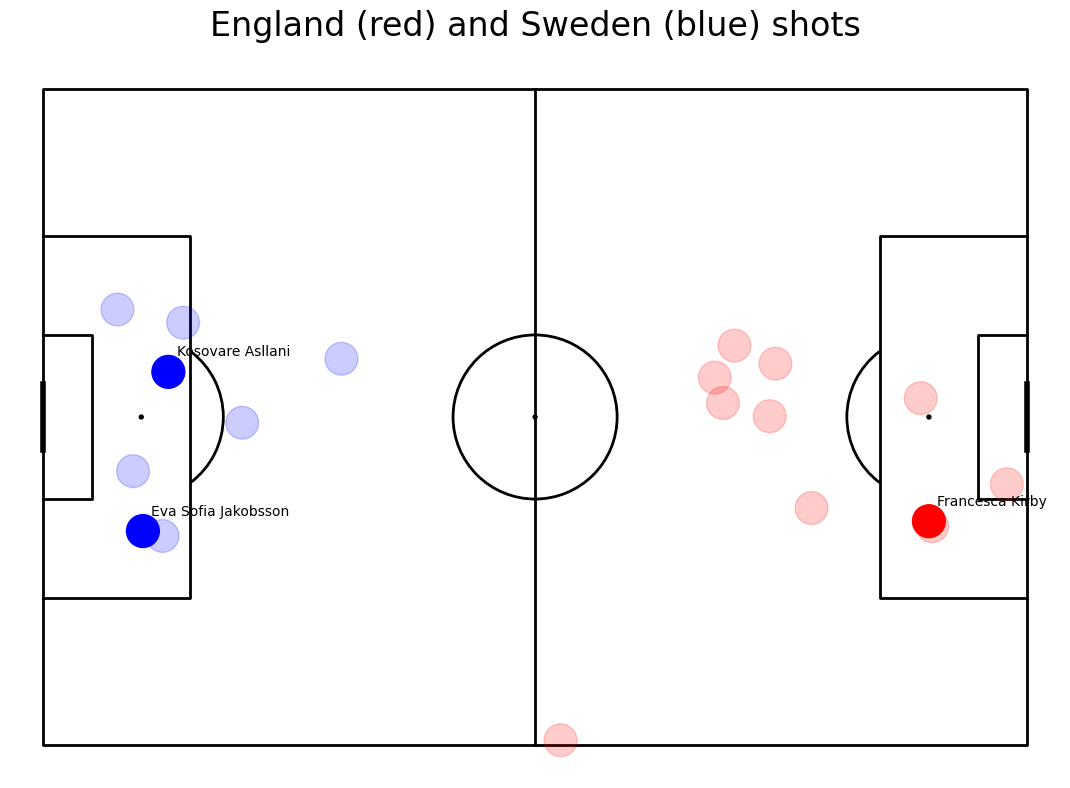

In [27]:
pitch = Pitch(line_color="black")
fig, ax = pitch.draw(figsize=(15,8))
pitchLengthX = 120
pitchWidthY = 80

for i, shot in shots.iterrows():
    x = shot["x"]
    y = shot["y"]
    goal = shot["outcome_name"]=="Goal"
    team_name = shot["team_name"]
    circleSize=2

    if team_name == team1:
        if goal:
            shotCircle = plt.Circle((x,y), circleSize, color="Red")
            plt.text(x+1, y-2, shot["player_name"])
        else:
            shotCircle = plt.Circle((x,y), circleSize, color="Red")
            shotCircle.set_alpha(.2)
    
    else:
        if goal:
            shotCircle = plt.Circle((pitchLengthX-x, pitchWidthY - y), circleSize, color="Blue")
            plt.text(pitchLengthX-x+1, pitchWidthY - y - 2, shot["player_name"])
        else:
            shotCircle = plt.Circle((pitchLengthX-x,pitchWidthY-y), circleSize, color="Blue")
            shotCircle.set_alpha(.2)
    
    ax.add_patch(shotCircle)

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(15,8)
plt.show();